In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 41, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += np.random.randn(*data.shape) # add noise

In [6]:
results = tt.fit_ensemble(data, range(1, 9), replicates=3, p_holdout=0.1)

Optimizing rank-1 models.
   3/3 converged, min error = 0.9675, max error = 0.9719, mean error = 0.9702, time to fit = 0.3589s
Optimizing rank-2 models.
   3/3 converged, min error = 0.9376, max error = 0.9381, mean error = 0.9378, time to fit = 0.5075s
Optimizing rank-3 models.
   3/3 converged, min error = 0.9069, max error = 0.9082, mean error = 0.9074, time to fit = 0.6759s
Optimizing rank-4 models.
   3/3 converged, min error = 0.9047, max error = 0.9053, mean error = 0.9049, time to fit = 4.6407s
Optimizing rank-5 models.
   3/3 converged, min error = 0.9030, max error = 0.9036, mean error = 0.9034, time to fit = 6.3273s
Optimizing rank-6 models.
   3/3 converged, min error = 0.8999, max error = 0.9014, mean error = 0.9009, time to fit = 9.6596s
Optimizing rank-7 models.
   3/3 converged, min error = 0.8993, max error = 0.8996, mean error = 0.8994, time to fit = 10.1578s
Optimizing rank-8 models.
   3/3 converged, min error = 0.8969, max error = 0.8976, mean error = 0.8972, time 

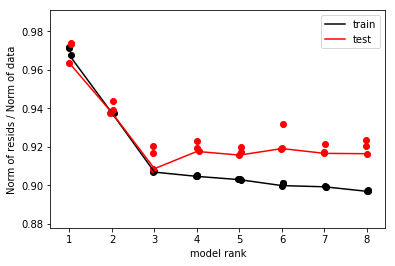

In [7]:
ax = tt.plot_error(results, partition='train',
                   line_kw=dict(c='k', label='train'), scatter_kw=dict(c='k'));
tt.plot_error(results, partition='test', ax=ax,
              line_kw=dict(c='r', label='test'), scatter_kw=dict(c='r'));
plt.legend()